# 06 - Projeções

Para essa atividade vamos usar o Numpy e Matplotlib. Assim vamos carregar as bibliotecas.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

Funções auxiliares

In [122]:
# Faz o setup para desenhar gráficos em 3D
def graph3d(c = 1.0):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_xlim3d(-4, 4)  # faixa de visualização de X
    ax.set_ylim3d(-4, 4)  # faixa de visualização de Y
    ax.set_zlim3d(-4, 4)  # faixa de visualização de Z
    ax.set_aspect('equal')
    ax.quiver([-c/2,0,0],[0,-c/2,0],[0,0,-c/2],
              [c,0,0],[0,c,0],[0,0,c],
              arrow_length_ratio=0.2, color="grey")
    fig.tight_layout()
    ax.view_init(elev=20.0, azim=30.0,  vertical_axis='y')
    return ax

# Desenha um plano no espaço
def draw_plane(ax, w, h, d):
    pontos = np.array([[-w/2.0, w/2.0, w/2.0, -w/2.0],
                       [-h/2.0, -h/2.0, h/2.0, h/2.0],
                       [d, d, d, d]])
    tri = Poly3DCollection([pontos.transpose()], alpha=.25)
    tri.set_color('blue')
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)

# Desenha um cubo no espaço
def draw_cube(ax):
    pontos = np.array([[-1,  1,  1, -1, -1, 1],
                       [-1, -1,  1,  1,  1, 1],
                       [-1, -1, -1, -1,  1, 1]])
    tri = Poly3DCollection([pontos.transpose()], alpha=.1)
    tri.set_color('blue')
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)

## Transformações Projetivas

Traga os pontos para um plano de projeção em d.

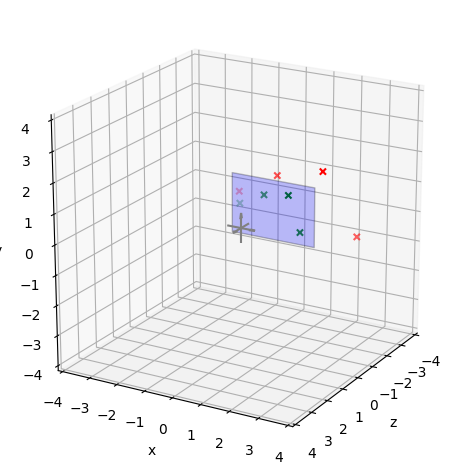

In [120]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

# distância do plano de projeção
d = -2

# plano de projeção de tamanho 3x2
draw_plane(ax, 3, 2, d)

# Pontos
pontos = np.array([[-1.8, 2.0, -0.5, 1.0],
                   [0.0, -1.2, 0.7, 1.0],
                   [-3.0, -4.0, -3.2, -3.5]])
ax.scatter(pontos[0], pontos[1], pontos[2], color='red', s=20, marker = "x")

# Ajustar os pontos para coordenadas homogêneas
pontos_h = np.append(pontos, [[1.0, 1.0, 1.0, 1.0]], axis=0)

# Calcular a matriz de projeção
Projecao = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 1/d, 0]])

# Multiplicar a matriz de projeção pelos pontos
pontos_proj_h = np.matmul(Projecao, pontos_h)

# Divisão Homogênea (Homogeneous Divide)
pontos_proj = np.true_divide(pontos_proj_h[:3,:], pontos_proj_h[3,:])

# Plota os novos pontos no gráfico
ax.scatter(pontos_proj[0], pontos_proj[1], pontos_proj[2], color='green', s=20, marker = "x")

plt.show()

Suponha que os vértices a seguir já estão posicionados na coordenada da câmera. Faça a Transformação desses pontos para o espaço NDC(Normalized Device Coords).

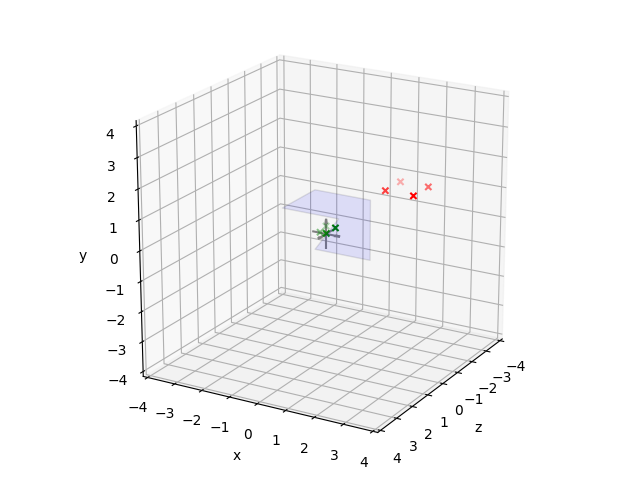

In [124]:
%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D
draw_cube(ax) # desenha o cubo do NDC

# field of view na vertical (em Y)
fovy = 45

# Resolução da imagem final
W = 300
H = 200

# Planos near e far
near = 0.5
far = 10

# Pontos
pontos = np.array([[1.0, 1.0, 2.0, 2.0],
                   [1.0, 1.0, 1.0, 1.0],
                   [-2.0, -3.0, -2.0, -3.0]])
ax.scatter(pontos[0], pontos[1], pontos[2], color='red', s=20, marker = "x")

# Encontrando razão de aspecto da visualização
aspect = float(W/H)

# Encontrando quantidades derivadas (Right e Top)
top = near * np.tan(np.radians(fovy))
right = top * aspect

# Ajustar os pontos para coordenadas homogêneas
pontos_h = np.append(pontos, [[1.0, 1.0, 1.0, 1.0]], axis=0)

# Calcular a matriz de projeção
Projecao = np.array([[near/right, 0, 0, 0],
                      [0, near/top, 0, 0],
                      [0, 0, -(far+near)/(far-near), -2*(far*near)/(far-near)],
                      [0, 0, -1, 0]])

# Multiplicar a matriz de perspectiva pelos pontos
pontos_proj_h = np.matmul(Projecao, pontos_h)

# Divisão Homogênea (Homogeneous Divide)
pontos_proj = np.true_divide(pontos_proj_h[:3,:], pontos_proj_h[3,:])

# Plota os novos pontos no gráfico
ax.scatter(pontos_proj[0], pontos_proj[1], pontos_proj[2], color='green', s=20, marker = "x")

plt.show()

Faça agora a transformação dos pontos acima para coordenadas de tela. Projete só as coordenadas 2D diretamente no gráfico abaixo.

In [105]:
# Faz o setup para desenhar gráficos
def graph(w, h):
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    ax.set_xlim(-1, w)
    ax.set_ylim(-1, h)
    ax.axhline(0, color='black') # deixa o X do eixo 0 em destaque
    ax.axvline(0, color='black') # deixa o Y do eixo 0 em destaque
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y')
    ax.invert_yaxis()

    return ax

Algum texto

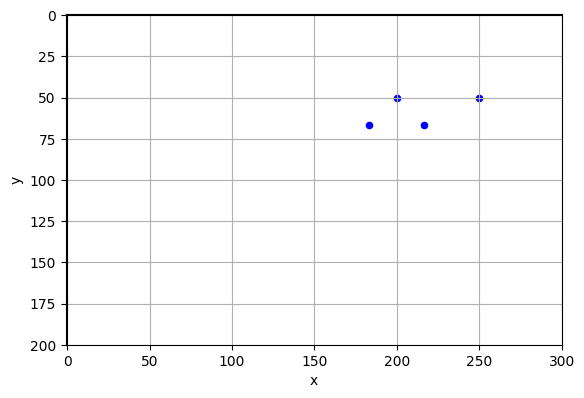

In [107]:
ax = graph(W, H) # configura o espaço para desenhar um gráfico 2D

# Calcular a matriz de transformação de tela (Screen)
Screen = np.array([[W/2, 0, 0, W/2],
                      [0, -H/2, 0, H/2],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])

# Multiplicar a matriz de perspectiva pelos pontos
pontos_screen = np.matmul(Screen, pontos_proj_h)

# Divisão Homogênea (Homogeneous Divide)
pontos2d = np.true_divide(pontos_screen[:2,:], pontos_screen[3,:])

plt.scatter(pontos2d[0], pontos2d[1], s=20, color="blue")
